In [1]:
import numpy as np
import matplotlib.pyplot as plt

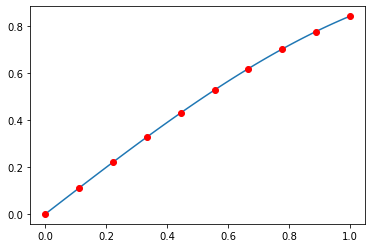

In [2]:
#Discretizacion
X = np.linspace(0, 1, 10)
Xfine = np.linspace(0, 1, 100)

plt.figure()
plt.plot(Xfine, np.sin(Xfine))
plt.plot(X, np.sin(X), 'or')
plt.show()

# Metodo de Euler
$$y(t_{n+1}) \approx y(t_n) + f(y(t_n), t_n)\Delta t$$

In [3]:
def f(y,t):
    return t + 2*y

In [4]:
# Tenemos la solucion exacta. y0 = 0.
def Exactf(t_):
    return -0.5*t_ - (1.-np.exp(2.*t_))/4.

In [5]:
# Definimos discretizacion

Tmin, Tmax, Npoints = 0, 1, 5
t = np.linspace(Tmin, Tmax, Npoints)
deltat = (Tmax - Tmin)/float(Npoints - 1)
print(deltat)

0.25


In [6]:
# Definimos un array para y
y = np.zeros(Npoints)
yexacta = np.zeros(Npoints)
yexacta = Exactf(t)

### El método requiere la condición inicial
$$y(0) = y_0$$

In [7]:
y[0] = 0.0

# Implementemos el metodo de Euler

def GetEuler(y,t,deltat):
    print('Corriendo método de Euler')
    for i in range(1,Npoints):
        y[i] = y[i-1] + f(y[i-1],t[i-1])*deltat

In [8]:
GetEuler(y, t, deltat)

Corriendo método de Euler


In [9]:
for i in range(Npoints):
    print(yexacta[i], y[i])

-0.0 0.0
0.03718031767503205 0.0
0.17957045711476127 0.0625
0.49542226758451613 0.21875
1.0972640247326626 0.515625


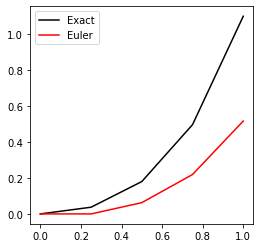

In [10]:
plt.figure(figsize=(4,4))
plt.plot(t,yexacta, c='k',label='Exact')
plt.plot(t,y, c='r', label='Euler')
plt.legend(loc=0)
plt.show()

# Estudiemos la estabilidad del método de euler

In [11]:
def fc(z):
    return 1.j*z

def ComplexEuler():
    global t
    global deltat
    global z
    z += fc(z)*deltat
    t += deltat

[6.28318531+0.j         1.89636415-0.17022851j]


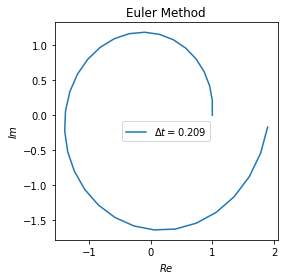

In [12]:

t = 0.
TMax = 2*np.pi

z  = 1.
Npoints = 30

deltat = TMax/np.int(Npoints)

# En el tiempo 0

data=[[t,z]]

for i in range(Npoints):
    ComplexEuler()
    data.append([t,z])
    
data = np.array(data)

print(data[-1])

plt.figure(figsize=(4,4))
plt.subplot(111)
plt.title("Euler Method")
plt.plot(np.real(data[:,1]),np.imag(data[:,1]), label=r'$\Delta t = %.3f$' %(deltat) )
plt.ylabel(r'$Im$')
plt.xlabel(r'$Re$')
plt.legend()

## Regla del punto medio
$$ y(t_{n+1}) \approx y(t_{n}) + \frac{1}{2}(k_{1}+k_{2})\Delta t  $$
$$ k_{1} = f(y_{n},t_{n}) $$$$ k_{2} = f(y_{n}+\Delta t f(y_{n},t_{n}), t_{n}+\Delta t)$$

In [13]:
# Implementamos la regla del punto medio

def get_euler_mejorado(y,t,deltat):
    print('Corriendo Euler Mejorado')
    for i in range(1, Npoints):
        k1 = f(y[i-1],t[i-1])
        k2 = f(y[i-1] + deltat*k1, t[i-1]+deltat)
        y[i] = y[i-1] + 0.5*deltat*(k1+k2)

In [14]:
# Definimos la discretización para el tiempo
Tmin, Tmax, Npoints = 0.,1., 5
t = np.linspace(Tmin, Tmax, Npoints)
deltat = (Tmax-Tmin)/float(Npoints-1)

In [15]:
y1 = np.zeros(Npoints)
y1[0] = 0.
get_euler_mejorado(y1,t,deltat)

Corriendo Euler Mejorado


In [16]:
for i in range(Npoints):
    print(yexacta[i], y[i], y1[i])

-0.0 0.0 0.0
0.03718031767503205 0.0 0.03125
0.17957045711476127 0.0625 0.16015625
0.49542226758451613 0.21875 0.44775390625
1.0972640247326626 0.515625 0.99322509765625


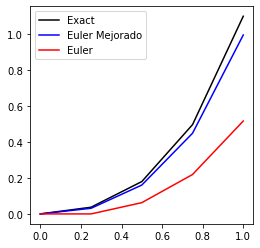

In [17]:
plt.figure(figsize=(4,4))
plt.plot(t,yexacta, c='k',label='Exact')
plt.plot(t,y1, c='b', label='Euler Mejorado')
plt.plot(t,y, c='r', label='Euler')
plt.legend(loc=0)
plt.show()

# Estudiemos la estabilidad del método de Euler mejorado

In [18]:
def fc(z):
    return 1.j*z

def ComplexEulerMejorado():
    global t
    global deltat
    global z
    k1 = fc(z)
    k2 = fc(z + fc(z)*deltat)
    z += 0.5*deltat*(k1+k2)
    t+=deltat

[6.28318531+0.j         1.00620556+0.04563393j]


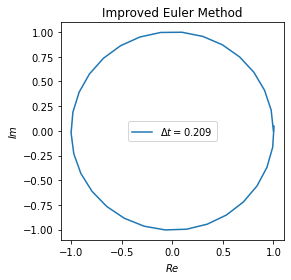

In [19]:
t = 0.
TMax = 2*np.pi
z = 1.
Npoints = 30
deltat = TMax/np.int(Npoints)
data=[[t,z]] # El tiempo 0

for i in range(Npoints):
    ComplexEulerMejorado()
    data.append([t,z])

data = np.array(data)
print(data[-1])    
plt.figure(figsize=(4,4))
plt.subplot(111)
plt.title("Improved Euler Method")
plt.plot(np.real(data[:,1]),np.imag(data[:,1]), label=r'$\Delta t = %.3f$' %(deltat) )
plt.ylabel(r'$Im$')
plt.xlabel(r'$Re$')
plt.legend()

# Comparación del error local

In [20]:
Tmin, Tmax, Npoints = 0.,1., 5
t = np.linspace(Tmin, Tmax, Npoints)
deltat = (Tmax-Tmin)/float(Npoints-1)

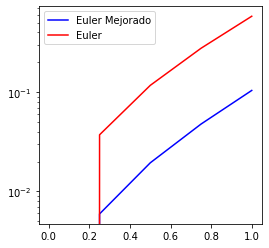

In [21]:
plt.figure(figsize=(4,4))
plt.plot(t,np.abs(yexacta-y1), c='b', label='Euler Mejorado')
plt.plot(t,np.abs(yexacta-y), c='r', label='Euler')
plt.legend(loc=0)
plt.yscale('log')
plt.show()

# Ecuaciones diferenciales de 2do orden
### Podemos entender el problema de 2do orden como un sistema de ecuaciones diferenciales de 1 orden --> Reducción de orden

In [23]:
Tmin, Tmax, Npoints = 0.,1., 11
t = np.linspace(Tmin, Tmax, Npoints)
deltat = (Tmax-Tmin)/float(Npoints-1)
print(deltat)

0.1


$$ x''(t) + 2 x'(t) + x(t) = 2e^{t}$$$$ x(0) = 0, x'(0) = 1 $$
Introducimos la variable $y(t) = x'(t)$

$$ x'(t) = y(t) $$$$ y'(t) = 2e^{t} - 2 y(t) - x(t) $$

In [25]:
# Definimos los arrays
yexacta = np.zeros(Npoints)
x = np.zeros(Npoints)
y = np.zeros(Npoints)
x[0] = 0
y[0] = 1

yexacta = np.sinh(t)

In [26]:
# Definimos las funciones
def f(x,y,t):
    return y

def g(x,y,t):
    return 2*np.exp(t) - 2*y - x

In [27]:
# Implementemos el metodo

def GetEuler(x,y,t,deltat):
    print('Corriendo método de Euler para 2 orden')
    for i in range(1,Npoints):
        x[i] = x[i-1] + f(x[i-1], y[i-1], t[i-1])*deltat
        y[i] = y[i-1] + g(x[i-1], y[i-1], t[i-1])*deltat

In [28]:
GetEuler(x,y,t,deltat)

Corriendo método de Euler para 2 orden


In [29]:
for i in range(len(x)):
    print(yexacta[i],x[i],y[i])

0.0 0.0 1.0
0.10016675001984403 0.1 1.0
0.201336002541094 0.2 1.0110341836151295
0.30452029344714265 0.301103418361513 1.0331078985241375
0.4107523258028155 0.40441420821392676 1.0663477384983593
0.5210953054937474 0.5110489820637627 1.1110017095055489
0.6366535821482414 0.6221491530143176 1.1674407235380886
0.7585837018395336 0.7388932253681265 1.236161423607141
0.888105982187623 0.8625093677288407 1.3177903578429955
1.0265167257081753 0.9942884035131403 1.413089535200006
1.1752011936438014 1.1355973570331408 1.5229634100400806


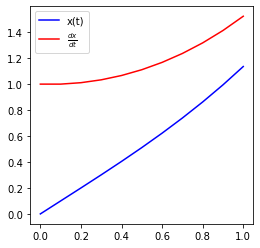

In [30]:
plt.figure(figsize=(4,4))
plt.plot(t,x, c='b', label='x(t)')
plt.plot(t,y, c='r', label=r'$\frac{dx}{dt}$')
plt.legend(loc=0)
plt.show()

# Oscilador armónico

In [46]:
Tmin, Tmax, Npoints = 0.,10., 100000
t = np.linspace(Tmin, Tmax, Npoints)
deltat = (Tmax-Tmin)/float(Npoints-1)

In [53]:
#definimos las funciones

def f(theta,omega,t):
    return omega

# w0 = 1. por sencillez

def g(theta,omega,t):
    #return -theta
    return -np.sin(theta) - 0.05*omega

In [54]:
# Definimos los arrays

theta = np.zeros(Npoints)
omega = np.zeros(Npoints)
theta[0] = (89.*np.pi)/180.
omega[0] = 0.

In [55]:
# implementamos el método
def GetEuler(theta,omega,t,deltat):
    print('Corriendo método de Euler para 2 orden')
    for i in range(1,Npoints):
        theta[i] = theta[i-1] + f(theta[i-1], omega[i-1], t[i-1])*deltat
        omega[i] = omega[i-1] + g(theta[i-1], omega[i-1], t[i-1])*deltat

In [56]:
GetEuler(theta,omega,t,deltat)


Corriendo método de Euler para 2 orden


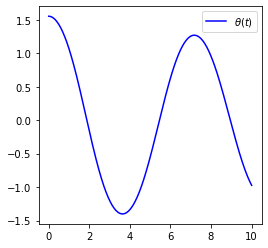

In [57]:
plt.figure(figsize=(4,4))
plt.plot(t,theta, c='b', label=r'$\theta(t)$')
plt.legend(loc=0)
plt.show()

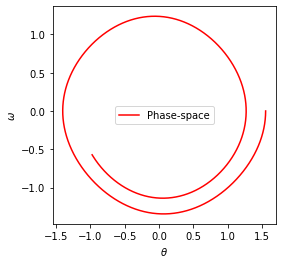

In [58]:
plt.figure(figsize=(4,4))
plt.plot(theta, omega, c='r', label='Phase-space')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\omega$')

plt.legend(loc=0)
plt.show()

In [ ]:
# Teo Liouville --> Un sistema fisico que evo-
#luciona en el tiempo debe conservar el volumen 
# del espacio de fase. 